In [1]:
from functions import BinPacking, BinPackingNewApproach, new_eq_optimal,  get_figure, interpret, eval_constrains
from functions import mapping_cost, cost_func, qaoa_circuit, check_best_sol
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CplexOptimizer, MinimumEigenOptimizer
from qiskit.algorithms.optimizers import COBYLA
import numpy as np
from qiskit_optimization.problems.constraint import ConstraintSense
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from qiskit import Aer
backend = Aer.get_backend("qasm_simulator")

In [26]:
#np.random.seed(1)
num_items = 4 # number of items
num_bins = num_items # maximum number of bins
max_weight = 15 # max weight of a bin
cases = 100
solutions_new = {}
optimal_new = []
ratio_new = []; new =[]
result_classical = []; result_qaoa_new = []
check_const = []
weights=[]
qaoa = MinimumEigenOptimizer(QAOA(optimizer=COBYLA(maxiter=100), reps=4, quantum_instance=backend))
for i in range(cases): # Testing 5 different randomly selected configurations of the problem
    print(f"----------- Case {i+1} -------------")
    weights.append(np.random.randint(1, max_weight, num_items)) # Randomly picking the item weight
    qubo_new = BinPackingNewApproach(num_items, num_bins, weights[-1], max_weight, alpha=1, simplification=True)
    qubo_classical, qp = BinPacking(num_items, num_bins, weights[-1], max_weight, simplification=True)
    result_classical.append(CplexOptimizer().solve(qubo_classical))
    optimal_new.append(new_eq_optimal(qubo_new, qubo_classical))
    result_qaoa_new.append(CplexOptimizer().solve(qubo_new))
    solutions_new = result_qaoa_new[-1].fval
    new.append(solutions_new)
    check_const.append(eval_constrains(qp, result_qaoa_new[-1].x, max_weight))
    print(check_const[-1])


----------- Case 1 -------------
True
----------- Case 2 -------------
True
----------- Case 3 -------------
True
----------- Case 4 -------------
True
----------- Case 5 -------------
True
----------- Case 6 -------------
True
----------- Case 7 -------------
True
----------- Case 8 -------------
True
----------- Case 9 -------------
True
----------- Case 10 -------------
True
----------- Case 11 -------------
False
----------- Case 12 -------------
True
----------- Case 13 -------------
True
----------- Case 14 -------------
True
----------- Case 15 -------------
True
----------- Case 16 -------------
True
----------- Case 17 -------------
True
----------- Case 18 -------------
True
----------- Case 19 -------------
True
----------- Case 20 -------------
True
----------- Case 21 -------------
True
----------- Case 22 -------------
True
----------- Case 23 -------------
True
----------- Case 24 -------------
True
----------- Case 25 -------------
True
----------- Case 26 -------------

In [27]:
print(f" The percetage of positive cases is {100*np.sum(check_const)/cases} %")

 The percetage of positive cases is 94.0 %


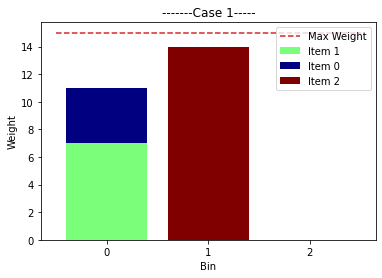

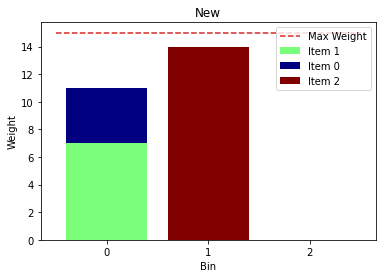

In [15]:
for i in range(len(result_classical)):
    fig = get_figure(interpret(result_classical[i].x, weights[i], max_weight, num_items, num_bins, simplify=True), weights[i], max_weight, title=f"-------Case {i+1}-----")
    fig = get_figure(interpret(result_qaoa_new[i].x, weights[i], max_weight, num_items, num_bins, simplify=True), weights[i], max_weight, title="New")

In [17]:
n = 5
alpha = np.linspace(0, 2*np.pi, n)
beta = np.linspace(0, np.pi, n)
map_cost_10 = mapping_cost(alpha, beta, qubo_new, n = 10)
map_cost_20 = mapping_cost(alpha, beta, qubo_new, n = 20)

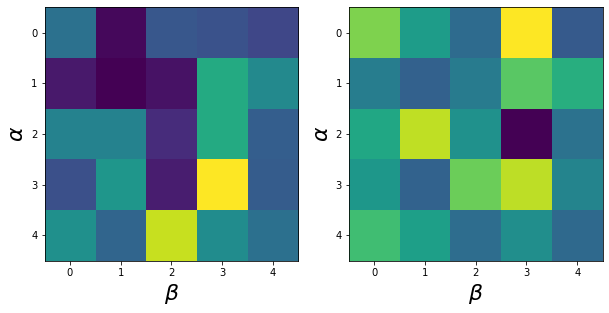

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(np.log(map_cost_10))
ax[1].imshow(np.log(map_cost_20))
for i in range(2):
#     ax[i].set_xticks([0,9,19], ["0", r"$\pi/2$", r"$\pi$"])
#     ax[i].set_yticks([0,9,19], ["0", r"$\pi$", r"2$\pi$"])
    ax[i].set_xlabel(r"$\beta$", fontsize=22)
    ax[i].set_ylabel(r"$\alpha$", fontsize=22)


In [25]:
x0 = np.random.rand(2)
circuit = qaoa_circuit(qubo_new)
objective = qubo_new.objective
num_evals = 10
fmin = minimize(cost_func, x0, args = (circuit, objective, num_evals), method="COBYLA")

In [20]:
best_sol = check_best_sol(fmin.x, circuit, qp, max_weight, n=20)

In [21]:
print(f" minimum my cost_fun {best_sol}, minimum with cplex {result_qaoa_new[-1].x}")

 minimum my cost_fun [1, 1, 0, 0, 0, 1, 0], minimum with cplex [0. 1. 0. 0. 0. 1. 0.]


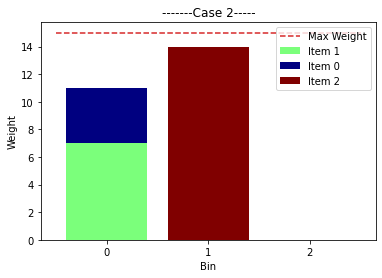

In [22]:
fig = get_figure(interpret(np.array(best_sol), weights[-1], max_weight, num_items, num_bins, simplify=True), weights[-1], max_weight, title=f"-------Case {i+1}-----")


In [12]:
best_sol

[1, 0, 1, 0, 0, 1, 0]

In [8]:
constraints = qp.linear_constraints
for i in constraints:
    print(i.evaluate(best_sol))


0.0
0.0
0.0
0.0
-15.0
